# The One-Dimensional Heat Equation

The heat equation in one dimension is given by

$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial^2 x}$.

In this equation, $\alpha$ is the thermal diffusion constant, which depends on the material and environmental properties. This is a partial differential equation, which may be solved analytically by Fourier-analysis. This is not done here, however. As a first step, we discretise the heat equation. The result will be

$\frac{T(x,\ t + \Delta t) - T(x, t)}{\Delta t} = \alpha \frac{T(x + \Delta x,\ t) - 2 T(x,\ t) + T(x - \Delta x,\ t)}{(\Delta x)^2}$.

Here, $\Delta x$ and $\Delta t$ are the separation of grid points and time steps respectively. Solving for $T(x,\ t + \Delta t)$, we immediately obtain

$T(x,\ t + \Delta t) = T(x,\ t) +  \alpha \frac{T(x + \Delta x,\ t) - 2 T(x,\ t) + T(x - \Delta x,\ t)}{(\Delta x)^2}\Delta t$.

We can replace $\alpha \frac{\Delta t}{(\Delta x)^2}$ by another constant $C$, simplifying the expression a little bit.

$T(x,\ t + \Delta t) = T(x,\ t) +  C \left[ T(x + \Delta x,\ t) - 2 T(x,\ t) + T(x - \Delta x,\ t) \right]$.

This equation can be expressed in terms of matrix multiplication if we express $T(x,\ t)$ as a state vector, given by

$T(x,\ t) = \begin{bmatrix}
                T(0,\ t) \\
                T(\Delta x,\ t) \\
                T(2\Delta x,\ t) \\
                \vdots \\
                T((N_x-1)\Delta x,\ t) \\
                T(L,\ t)
            \end{bmatrix}$.

Here, $L = N_x \Delta x$, which is the width of our box and $N_x$ is the number of grid points. It can then be shown that 

$D \left[ T(x + \Delta x,\ t) - 2 T(x,\ t) + T(x - \Delta x,\ t) \right] = C \begin{bmatrix}
                -2     & 1      & 0      & 0      & \cdots & 0      & 0      \\
                1      & -2     & 1      & 0      & \cdots & 0      & 0      \\
                0      & 1      & -2     & 1      & \cdots & 0      & 0      \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0      & 0      & 0      & 0      & \cdots & -2     & 1      \\
                0      & 0      & 0      & 0      & \cdots & 1      & -2     \\
            \end{bmatrix}
            \begin{bmatrix}
                T(0,\ t) \\
                T(\Delta x,\ t) \\
                T(2\Delta x,\ t) \\
                \vdots \\
                T((N_x-1)\Delta x,\ t) \\
                T(L,\ t)
            \end{bmatrix}$.
            
At this point, it certainly becomes more convenient to express $T(x, t)$ in a different way. We write

$T(x, t) = T^m_n$,

where $m$ denotes the x-component and $n$ denotes the $t$ component of $T$ respectively. In this notation we can write

$C \left[ T(x + \Delta x,\ t) - 2 T(x,\ t) + T(x - \Delta x,\ t) \right] = C \left[ T^{m+1}_n - 2 T^m_n + T^{m-1}_n \right]$.

We can plug this back in our original equation for $T(x,\ t + \Delta t) = T^m_{n+1}$ as

$T^m_{n+1} = T^m_n + C \left[ T^{m+1}_n - 2 T^m_n + T^{m-1}_n \right]$.

The matrix equation above then becomes

$C \left[ T^{m+1}_n - 2 T^m_n + T^{m-1}_n \right] = C \begin{bmatrix}
                -2     & 1      & 0      & 0      & \cdots & 0      & 0      \\
                1      & -2     & 1      & 0      & \cdots & 0      & 0      \\
                0      & 1      & -2     & 1      & \cdots & 0      & 0      \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0      & 0      & 0      & 0      & \cdots & -2     & 1      \\
                0      & 0      & 0      & 0      & \cdots & 1      & -2     \\
            \end{bmatrix}
            \begin{bmatrix}
                T^0_n \\
                T^1_n \\
                T^2_n \\
                \vdots \\
                T^{N_x - 1}_n \\
                T^{N_x}_n
            \end{bmatrix}$.
            
And combining this with our previous equation, we get

$ \begin{bmatrix}
   T^0_{n+1} \\
   T^1_{n+1} \\
   T^2_{n+1} \\
   \vdots \\
   T^{N_x - 1}_{n+1} \\
   T^{N_x}_{n+1}
  \end{bmatrix} = 
  \begin{bmatrix}
   T^0_n \\
   T^1_n \\
   T^2_n \\
   \vdots \\
   T^{N_x - 1}_n \\
   T^{N_x}_n
  \end{bmatrix}
  +  C \begin{bmatrix}
                -2     & 1      & 0      & 0      & \cdots & 0      & 0      \\
                1      & -2     & 1      & 0      & \cdots & 0      & 0      \\
                0      & 1      & -2     & 1      & \cdots & 0      & 0      \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0      & 0      & 0      & 0      & \cdots & -2     & 1      \\
                0      & 0      & 0      & 0      & \cdots & 1      & -2     \\
            \end{bmatrix}
            \begin{bmatrix}
                T^0_n \\
                T^1_n \\
                T^2_n \\
                \vdots \\
                T^{N_x - 1}_n \\
                T^{N_x}_n
            \end{bmatrix}$.

This expression can be simplified a little further by noting that the first vector on the RHS is the equal to the identity matrix times the vector itself. We can then take this identity matrix out of the brackets and add it to the derivative matrix. This gives

$ \begin{bmatrix}
   T^0_{n+1} \\
   T^1_{n+1} \\
   T^2_{n+1} \\
   \vdots \\
   T^{N_x - 1}_{n+1} \\
   T^{N_x}_{n+1}
  \end{bmatrix} = 
            \begin{bmatrix}
                1-2C   & C      & 0      & 0      & \cdots & 0      & 0      \\
                C      & 1-2C   & C      & 0      & \cdots & 0      & 0      \\
                0      & C      & 1-2C   & C      & \cdots & 0      & 0      \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0      & 0      & 0      & 0      & \cdots & 1-2C   & C      \\
                0      & 0      & 0      & 0      & \cdots & C      & 1-2C   \\
            \end{bmatrix}
            \begin{bmatrix}
                T^0_n \\
                T^1_n \\
                T^2_n \\
                \vdots \\
                T^{N_x - 1}_n \\
                T^{N_x}_n
            \end{bmatrix}$.
            
We can call this matrix $D$, giving 

$D = \begin{bmatrix}
                1-2C   & C      & 0      & 0      & \cdots & 0      & 0      \\
                C      & 1-2C   & C      & 0      & \cdots & 0      & 0      \\
                0      & C      & 1-2C   & C      & \cdots & 0      & 0      \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0      & 0      & 0      & 0      & \cdots & 1-2C   & C      \\
                0      & 0      & 0      & 0      & \cdots & C      & 1-2C   \\
            \end{bmatrix}$.
            
Our expression then becomes

$ \begin{bmatrix}
   T^0_{n+1} \\
   T^1_{n+1} \\
   T^2_{n+1} \\
   \vdots \\
   T^{N_x - 1}_{n+1} \\
   T^{N_x}_{n+1}
  \end{bmatrix} = 
          D \begin{bmatrix}
                T^0_n \\
                T^1_n \\
                T^2_n \\
                \vdots \\
                T^{N_x - 1}_n \\
                T^{N_x}_n
            \end{bmatrix}$.

This expression can be understood as follows. The temperature configuration, defined in terms of a state vector, at the new time is the temperature configuration at some old time multiplied by a matrix. In order for this calculation to be stable, $C \leq \frac{1}{2}$, or in terms of our initial constants, $2\alpha \frac{\Delta t}{(\Delta x)^2} \leq 1$. This is called the CFL condition.

### Packages

First, a few packages need to be included.

In [26]:
import matplotlib.pyplot as plt             # for plotting
import math                                 # for pi etc.
import numpy as np                          # for numpy
import numpy.linalg as la                   # for linear algebra
import scipy.sparse as sp                   # for sparse matrices

### Physical Constants

Below are the physical constants used in this simulation.

In [27]:
L = 5                                       # [m] Length of rod.
R = 0.02                                    # [m] Radius of rod.

rho = 8960                                  # [kg/m³] Density of copper.
Alpha = 11e-6                               # [m²/s] Thermal diffusivity of copper.
C_cu = 380                                  # [J/kgK] Specific heat capacity of copper.

mass = rho * math.pi*R*R*L                  # [kg] Mass of rod.
C_tot = C_cu * mass                         # [J/K] Heat capacity of rod.

### Numerical Constants

Numerical constants used in this simulation are given below.

In [45]:
T = 100000                                  # [s] Total time.

Nx = 300                                    # [] Number of grid points along rod.

dx = L/Nx                                   # [m] Distance step size.
ft = 2                                      # [] A dimensionless factor determining the timestep dt. Must be greater than or equal to 1 to ensure numerical stability.
dt = dx*dx /(ft * 2 * Alpha)                # [s] Time step size.

print(dt)

Nt = math.ceil(T/dt)                        # [] Number of time steps.

D = Alpha*dt/(dx*dx)                        # [] Recurring constant.

H = 50                                      # [W] Heat added per second.

6.313131313131313


### Arrays and Matrices

Below we will define the arrays and matrices.

In [46]:
uxt = np.array([0.]*(Nx+1))                                     # [K] Matrix representing temperature.
Hmat = sp.csr_matrix(((Nx+1), (Nx+1)), dtype = float).toarray() # [] Time evolution matrix.
Heat = np.array([0.]*(Nx+1))                                    # [K/s] Heat array.
X = np.arange(0, L+dx, dx)                                      # [m] Array with all position coordinates.

### Initial Conditions

We will define three functions as an initial temperature distribution. We can choose which one we want to use.

In [47]:
#------------------------------------------------------- Initial Distributions
# Gaussian distribution with:
# T0 the base temperature
# Tmax the height of the gaussian peak
# Centre the centre of the gaussian distribution
# Delta the width of the gaussian distribution
# x the position at which the temperature is to be determined
def gaussian(T0, Tmax, Centre, Delta, x):
    return T0 + Tmax * math.exp(-pow((x - Centre)/Delta, 2))

# Sinusoidal distribution with:
# T0 the base temperature
# Tmax the amplitude of the sine
# Length the length of the rod
# x the position at which the temperature is to be determined
def sine(T0, Tmax, Length, x):
    return T0 + Tmax * math.sin(2*math.pi * x/Length)

# Linear distribution with:
# T0 the base temperature
# Slope the slope of the linear distribution
# x the position at which the temperature is to be determined
def linear(T0, Slope, x):
    return T0 + Slope*x

### Choice of Initial Function

In the part below, we fill in the initial temperature distribution. We can comment out the distributions we are not interested in and keep the one we want. Of course, we can use any function as an initial condition.

In [48]:
Hmat[0, 1] = 1                              # This boundary condition ensures that du/dx(x=0) = 0 at every timestep.
Hmat[Nx, Nx-1] = 1                          # This boundary condition ensures that du/dx(x=L) = 0 at every timestep.

for kk in range(0, Nx+1):                   # The initial condition is a Gaussian temperature distribution.
    uxt[kk] = gaussian(300, 200, L/3, L/7.5, kk*dx)          # Gaussian
    #uxt[kk] = sine(300, 200, L, kk*dx)                    # Sine
    #uxt[kk] = linear(300, 40, kk*dx)                      # Linear

### Defining the H-Matrix and the Heat Array

It is inconvenient that I called both the time evolution matrix and the heat array $H$. Therefore, a distinction will be made in the name. The time evolution matrix is called "Hmat" and the heat array is called "Heat".

In [49]:
#----------------------------------------------------------- Fill the H-matrix
for ii in range(1, Nx):                     # The H-matrix is defined according to the finite-element method.
    Hmat[ii, ii] = 1-2*D
    Hmat[ii, ii+1] = D
    Hmat[ii, ii-1] = D

#------------------------------------------------------- Define the heat array
for mm in range(math.floor(Nx/3), math.floor(Nx/3) + 10):
    Heat[mm] = H/C_tot*dt

### Time Evolution

The time evolution is performed below. The plotting is performed in the same code. This is done to make the calculation quicker.

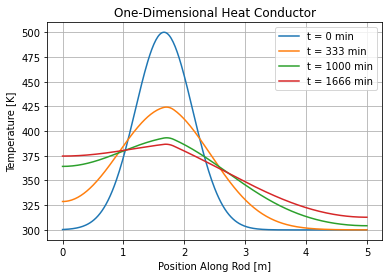

In [50]:
#-------------------------------------------------------------- Time Evolution
# Four times at which the temperature distribution is evaluated
T2 = math.floor(Nt/5)                       # [] Time 2
T3 = math.floor(3*Nt/5)                     # [] Time 3
T4 = Nt                                     # [] Time 4

# Initialises legend and plots the initial state
ax = plt.subplot(111)
ax.plot(X, uxt, label='t = '+str('0 min'))

for jj in range(1, Nt+1):
    uxt = Hmat @ uxt + Heat                  # The next state is calculated by multiplying the Hmatrix by the previous state.

    # At T2, T3 and T4, uxt is plotted.
    if jj == T2:
        ax.plot(X, uxt, label='t = '+str(math.floor(T*T2/(60*Nt)))+' min')

    if jj == T3:
        ax.plot(X, uxt, label='t = '+str(math.floor(T*T3/(60*Nt)))+' min')

    if jj == T4:
        ax.plot(X, uxt, label='t = '+str(math.floor(T*T4/(60*Nt)))+' min')
        
#-------------------------------------------------------------------- Plotting
                                    # Axis and graph titles
plt.title('One-Dimensional Heat Conductor')
plt.xlabel('Position Along Rod [m]')
plt.ylabel('Temperature [K]')

                                    # Display a grid and show the plots and legend
ax.legend()
plt.grid(True)
plt.show()

### Concluding Remarks

The simulation works as expected and is in the most general form for a one-dimensional problem. We will reuse part of this analysis when we investigate time evolution of the quantum-mechanical wave function.